<a href="https://colab.research.google.com/github/kamilarakhimova/customer-satisfaction-service/blob/main/solution/My_solution_Part_2_ML_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **Тема:** Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании.

Решаем задачу прогноза удовлетворенности клиента авиакомпании полетом.

*Прим.:* в данной части проводится только построение ML-модели и подбор метрики.

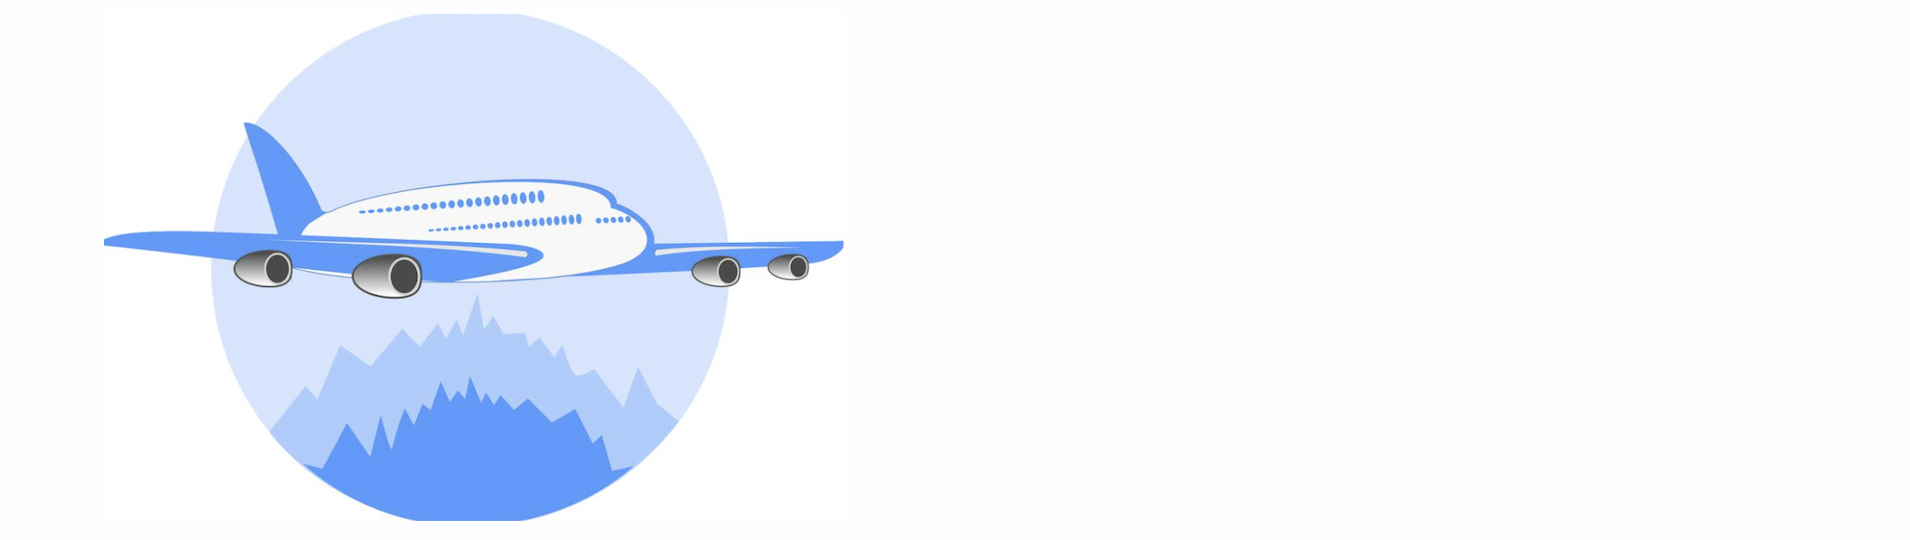



---



## Импорт библиотек, константы

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
RANDOM_STATE = 42

In [72]:
DATASET_PATH = "https://raw.githubusercontent.com/kamilarakhimova/customer-satisfaction-service/main/airline_clients_clean.csv"

## Загрузка и обзор данных

### Загрузка

Здесь представлено 2 варианта загрузки датасета

- 1-ый наиболее простой, датасет загружается из моего (автора) открытого репозитория Github

- 2-ой на случай, если первый вдруг не заработает,  загружает данные из таблицы 'airline_clients_clean.csv', предварительно загруженной в "Файлы" тетрадки

Саму таблицу можно найти в моём репозитории на Github, в том же самом репозитории, в котором Вы нашли эту тетрадку :)

In [73]:
# загрузка данных
df = pd.read_csv(DATASET_PATH) # вариант 1
'''df = pd.read_csv('airline_clients_clean.csv')''' # вариант 2

"df = pd.read_csv('airline_clients_clean.csv')"

### Описание данных

Ввиду обработки данных в предыдущей части, появилось много изменений, которые будут описаны далее

**Целевая переменная**
- `satisfaction_neutral or dissatisfied`: (не)удовлетворенность клиента полетом, бинарная (если 1, то *neutral or dissatisfied*, иначе 0 = *satisfied / undecided*)

Также есть столбцы `satisfaction_satisfied` и `satisfaction_undecided`, которые представляют собой удовлетворённость/неопределённость клиента соответственно, тоже бинарные. В дальнейшем они не будут использоваться абсолютно, это просто побочные продукты от деления изначально категориального столбца с целевой переменной

**Признаки (масштабированные)**
- `Gender` (binary: `Gender_Male` или `Gender_Female` или `Gender_Non-binary`): пол клиента
- `Age` (numeric): количество полных лет
- `Customer Type` (binary): лоялен ли клиент авиакомпании? если да, то 1, иначе 0
- `Type of Travel` (binary): тип поездки, если персональный ('Personal Travel'), то 1, иначе = если бизнес ('Business Travel'), то 0
- `Class` (binary: `Class_Business` или `Class_Eco` или `Class_Eco Plus`): класс обслуживания в самолете
- `Flight Distance` (numeric): дальность перелета в милях
- `Departure Delay in Minutes` (numeric): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric): задержка прибытия (неотрицательная)
- `Inflight wifi service` (numeric): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (numeric): оценка клиентом удобства времени прилета и вылета
- `Ease of Online booking` (numeric): оценка клиентом удобства онлайн-бронирования
- `Gate location` (numeric): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (numeric): оценка клиентом еды и напитков на борту
- `Online boarding` (numeric): оценка клиентом выбора места в самолете
- `Seat comfort` (numeric): оценка клиентом удобства сиденья
- `Inflight entertainment` (numeric): оценка клиентом развлечений на борту
- `On-board service` (numeric): оценка клиентом обслуживания на борту
- `Leg room service` (numeric): оценка клиентом места в ногах на борту
- `Baggage handling` (numeric): оценка клиентом обращения с багажом
- `Checkin service` (numeric): оценка клиентом регистрации на рейс
- `Inflight service` (numeric): оценка клиентом обслуживания на борту
- `Cleanliness` (numeric): оценка клиентом чистоты на борту

In [74]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128629 entries, 0 to 128628
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            128629 non-null  int64  
 1   Gender_Female                         128629 non-null  float64
 2   Gender_Male                           128629 non-null  float64
 3   Gender_Non-binary                     128629 non-null  float64
 4   Class_Business                        128629 non-null  float64
 5   Class_Eco                             128629 non-null  float64
 6   Class_Eco Plus                        128629 non-null  float64
 7   satisfaction_neutral or dissatisfied  128629 non-null  float64
 8   satisfaction_satisfied                128629 non-null  float64
 9   satisfaction_undecided                128629 non-null  float64
 10  Age                                   128629 non-null  float64
 11  

In [75]:
# (псевдо)случайные 5 записей
df.sample(5, random_state=RANDOM_STATE).transpose()

,62024,56803,75407,74556,67138
Unnamed: 0,62024.000000,56803.000000,75407.000000,74556.000000,67138.000000
Gender_Female,1.000000,0.000000,1.000000,0.000000,0.000000
Gender_Male,0.000000,1.000000,0.000000,1.000000,1.000000
Gender_Non-binary,0.000000,0.000000,0.000000,0.000000,0.000000
Class_Business,0.000000,0.000000,0.000000,1.000000,1.000000
Class_Eco,1.000000,0.000000,1.000000,0.000000,0.000000
Class_Eco Plus,0.000000,1.000000,0.000000,0.000000,0.000000
satisfaction_neutral or dissatisfied,0.000000,1.000000,1.000000,0.000000,0.000000
satisfaction_satisfied,0.000000,0.000000,0.000000,1.000000,1.000000
satisfaction_undecided,1.000000,0.000000,0.000000,0.000000,0.000000


Сразу видим, что закрался какой-то непонятный столбец "Unnamed: 0", который до этого мы ни разу не видели.

Судя по значениям, он представляет собой отголоски индекса DataFrame, который задаётся по умолчанию.

Короче, удаляем

In [76]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# смотрим теперь что у нас есть
df.sample(5, random_state=RANDOM_STATE).transpose()

,62024,56803,75407,74556,67138
Gender_Female,1.000000,0.000000,1.000000,0.000000,0.000000
Gender_Male,0.000000,1.000000,0.000000,1.000000,1.000000
Gender_Non-binary,0.000000,0.000000,0.000000,0.000000,0.000000
Class_Business,0.000000,0.000000,0.000000,1.000000,1.000000
Class_Eco,1.000000,0.000000,1.000000,0.000000,0.000000
Class_Eco Plus,0.000000,1.000000,0.000000,0.000000,0.000000
satisfaction_neutral or dissatisfied,0.000000,1.000000,1.000000,0.000000,0.000000
satisfaction_satisfied,0.000000,0.000000,0.000000,1.000000,1.000000
satisfaction_undecided,1.000000,0.000000,0.000000,0.000000,0.000000
Age,0.203540,0.176991,0.097345,0.309735,0.433628


Супер, теперь данные нас очень даже устраивают!

Пора приступать к построению модели

## Построение ML-модели

### Выбор matrix of features и target

Обозначим матрицу объекты-признаки и целевую переменную

In [77]:
# матрица объекты-признаки (matrix of features)
X = df.drop(['satisfaction_neutral or dissatisfied','satisfaction_satisfied', 'satisfaction_undecided'], axis=1)

# целевая переменная (target)
y = df['satisfaction_neutral or dissatisfied']

In [78]:
df.shape

(128629, 29)

### Разбивка на train и test части

Разобьём данные на тренировочную и тестовую части

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((96471, 26), (32158, 26))

Для решения нашей задачи попробуем использовать линейный классификатор под названием **логистическая регрессия**.

In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Смотрим качество модели

In [81]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[13226,  4286],
       [ 3342, 11304]])

Посмотрим ещё количество данных каждого вида в целевой переменной

In [82]:
y_test.value_counts()

0.0    17512
1.0    14646
Name: satisfaction_neutral or dissatisfied, dtype: int64

## Выбор метрики

В этой задаче наша цель - выявить как можно больше клиентов, которые не будут удовлетворены сервисом (класс 0).

Можно представить, что данные о клиенте и о маршруте загружаются изначально, а каждая оценка клиентом выставляется в процессе регистрации, посадки на борт, непосредственно полёта и пр.

И нам нужно на основании полученных данных постараться заранее предсказать будет ли клиент доволен сервисом в самом конце, при выходе из самолёта.

Или следует предложить ему какой-то бонус от авиакомпании, чтобы он всё-таки был не слишком сильно недоволен. Потому что в таком случае он вероятнее ещё раз воспользуется услугами авиакомпании и будет рекомендовать её близким.

А нужная нам метрика -- это `recall` (полнота). Она покажет долю найденных неудовлетворённых клиентов среди всех неудовлетворённых клиентов

Смотрим её значение

In [83]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.77181482998771

Выглядит весьма неплохо. Посмотрим-ка ещё на парную к полноте метрику - precision (точность). Она показывает долю правильных ответов среди тех, кого модель отнесла к неудовлетворённым клиентам. В нашем случае она менее важна, тк если модель решит, что человек будет неудовлетворён сервисом, а он будет удовлетворён, то мы только выиграем!

In [84]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.7250801796023092

А теперь попробуем оптимизировать нашу целевую метрику `recall`

In [85]:
# смотрим на предсказания вероятности нашей моделью
probs = model.predict_proba(X_test)

probs[:5]

array([[0.18271345, 0.81728655],
       [0.10617583, 0.89382417],
       [0.16241171, 0.83758829],
       [0.60658653, 0.39341347],
       [0.85174946, 0.14825054]])

Стандартный порог для перевода вероятности в классы $\theta=0.5$.

In [86]:
classes = probs[:,1] > 0.5

classes[:5]

array([ True,  True,  True, False, False])

Подбором порога принятия решений можно повлиять на точность и полноту. Будем экспериментировать

In [87]:
classes = probs[:,1] > 0.048

print(f'confusion matrix is \n {confusion_matrix(y_test, classes)}')
print(f'recall is {recall_score(y_test, classes)}')
print(f'precision is {precision_score(y_test, classes)}')

confusion matrix is 
 [[ 1548 15964]
 [    0 14646]]
recall is 1.0
precision is 0.4784710878797778


Отлично, мы достигли максимального возможного значения целевой метрики `recall` = 1.

Это здорово, но, кажется, бизнесу не очень выгодно получается предлагать бонусы более 30000 клиентам, это более 90% клиентов от количества имеющихся в датасете.

Давайте предположим, что у нас щедрая авиакомпания и она готова предлагать клиентам бонусы, но для не более чем 70% от числа всех клиентов (в каждом рейсе, например).

В нашем случае максимальное допустимое число клиентов для выдачи бонуса для тестовой выборки получается

In [88]:
total_clients = y_test.shape[0]
print(f'Всего клиентов в тестовой выборке {total_clients}')

# находим 0.75 часть от числа всех клиентов
limit_clients = round(total_clients * 0.7)
print(f'Максимально допустимое число клиентов для выдачи бонуса в тестовой выборке {limit_clients}')

Всего клиентов в тестовой выборке 32158
Максимально допустимое число клиентов для выдачи бонуса в тестовой выборке 22511


Тогда путём экспериментов находим порог

In [89]:
classes = probs[:,1] > 0.19

print(f'confusion matrix is \n {confusion_matrix(y_test, classes)}')
print(f'recall is {recall_score(y_test, classes)}')
print(f'precision is {precision_score(y_test, classes)}')

confusion matrix is 
 [[ 9382  8130]
 [  342 14304]]
recall is 0.9766489143793528
precision is 0.6376036373361862


Ну вот, теперь значение целевой метрики достаточно высокое, а мы удовлетворяем требованиям бизнеса!

## Итоги

### Интерпретация модели

Взглянем на веса/коэффициенты модели

In [90]:
model.coef_

array([[ 0.33536067,  0.28474452,  0.07542328, -0.10707363,  0.37223566,
         0.43036644,  0.36383268, -1.32276218,  1.63140948, -0.16042203,
         2.538915  ,  3.38668327, -1.28161487,  0.37830467,  0.90681412,
        -0.21209286,  0.17485901, -1.92248171, -0.22026386, -0.26597013,
        -0.68295627, -0.84966111, -0.32911123, -0.72276438, -0.37563029,
        -0.45015402]])

In [91]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
17,-1.922482,Online boarding
7,-1.322762,Customer Type
12,-1.281615,Inflight wifi service
21,-0.849661,Leg room service
23,-0.722764,Checkin service
20,-0.682956,On-board service
25,-0.450154,Cleanliness
24,-0.375630,Inflight service
22,-0.329111,Baggage handling
19,-0.265970,Inflight entertainment


Итак, судя по нашим данным, в сравнении с остальными признаками наибольший вес имеют задержки, причём как отправления, так и прибытия. Чем больше задержка, тем вероятнее, что пассажир будет неудовлетворён. В этом клиентов можно понять.

Также достаточно весомую роль играют оценка клиентом выбора места в самолете (причём в обратную сторону: чем больше эта оценка - тем вероятнее, что клиент будет удовлетворён сервисом), тип поездки: персональный или бизнес (если персональный, то вероятнее, что клиент будет неудовлетворён сервисом, а вот в бизнес-поездках люди видимо не так придирчивы), изначальная лояльность/нелояльность клиента (тоже в обратную сторону: чем лояльнее клиент, тем вероятнее, что он не будет неудовлетворен, что звучит логично) и оценка клиентом интернета на борту (также чем выше оценка - тем выше вероятность, что клиент будет удовлетворен).

### Сохранение модели

In [92]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# для загрузки модели из файла раскомментируйте следующий код
'''
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)
'''

"\nwith open('model.pickle', 'rb') as f:\n    model = pickle.load(f)\n"